In [229]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [230]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2812,2022-05-30,29443.365234,31949.630859,29303.572266,31726.390625,31726.390625,39277993274
2813,2022-05-31,31723.865234,32249.863281,31286.154297,31792.310547,31792.310547,33538210634
2814,2022-06-01,31792.554688,31957.285156,29501.587891,29799.080078,29799.080078,41135817341
2815,2022-06-02,29794.890625,30604.734375,29652.705078,30467.488281,30467.488281,29083562061
2816,2022-06-03,30428.882813,30633.035156,30340.671875,30378.000000,30378.000000,27530907648


In [231]:
data.shape

(2817, 7)

Text(0, 0.5, 'Close Price (USD)')

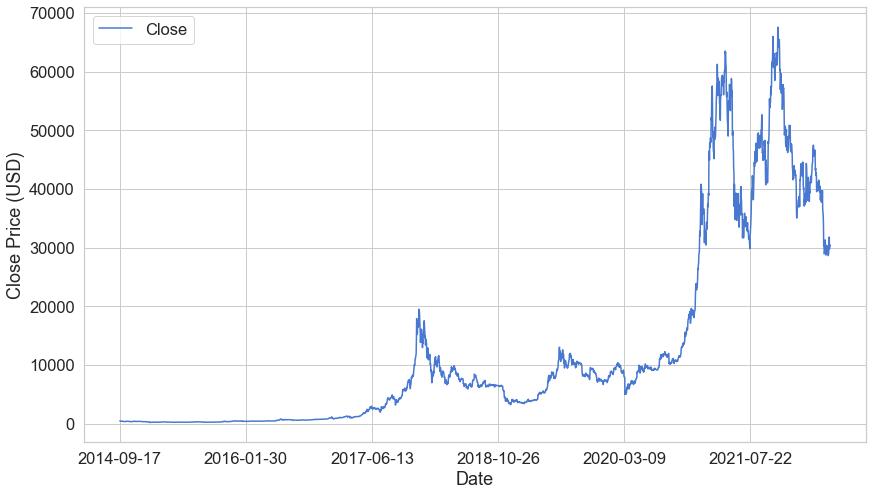

In [232]:
ax = data.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

In [233]:
data = data.drop(['Date', 'Adj Close'], axis = 1)

In [234]:
data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


In [235]:
num_shape = 2000
data_training = data.iloc[:num_shape, :].values
data_test = data.iloc[num_shape:, :].values

In [236]:
data_training

array([[4.65864014e+02, 4.68174011e+02, 4.52421997e+02, 4.57334015e+02,
        2.10568000e+07],
       [4.56859985e+02, 4.56859985e+02, 4.13104004e+02, 4.24440002e+02,
        3.44832000e+07],
       [4.24102997e+02, 4.27834991e+02, 3.84532013e+02, 3.94795990e+02,
        3.79197000e+07],
       ...,
       [9.07830859e+03, 9.16769531e+03, 9.03207910e+03, 9.12254590e+03,
        4.08268857e+10],
       [9.12160059e+03, 9.16322070e+03, 8.89074414e+03, 8.90995410e+03,
        3.62169304e+10],
       [8.90820606e+03, 8.91434375e+03, 8.10525293e+03, 8.10811621e+03,
        3.99731021e+10]])

In [237]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.01497323],
       [0.01450668],
       [0.01280933],
       ...,
       [0.46123923],
       [0.46348247],
       [0.45242513]])

In [238]:
X_train = [] 
Y_train = []

In [239]:
# multivariate data preparation
from numpy import array
from numpy import hstack
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [240]:
training_data.shape[0]
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(1940, 60, 1)

In [241]:
X_train

array([[[0.01497323],
        [0.01450668],
        [0.01280933],
        ...,
        [0.01297359],
        [0.0125147 ],
        [0.01154226]],

       [[0.01450668],
        [0.01280933],
        [0.01128437],
        ...,
        [0.0125147 ],
        [0.01154226],
        [0.010251  ]],

       [[0.01280933],
        [0.01128437],
        [0.01197933],
        ...,
        [0.01154226],
        [0.010251  ],
        [0.01095668]],

       ...,

       [[0.37481689],
        [0.39337909],
        [0.41375607],
        ...,
        [0.45020644],
        [0.44622457],
        [0.4447604 ]],

       [[0.39337909],
        [0.41375607],
        [0.40962943],
        ...,
        [0.44622457],
        [0.4447604 ],
        [0.46123923]],

       [[0.41375607],
        [0.40962943],
        [0.39905949],
        ...,
        [0.4447604 ],
        [0.46123923],
        [0.46348247]]])

In [242]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 60, 50)            11200     
                                                                 
 dropout_36 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_37 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_37 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_38 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_38 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_39 (LSTM)              (None, 120)             

In [243]:
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.